#### 1 Online Retail Market Basket Analysis

#### Ryan Martin
#### CS 7180
#### 6/6/19

In [1]:
import pandas as pd
pd.set_option("max_colwidth", 150)

f = "https://github.com/cs6220/cs6220.spring2019/raw/master/data/Online%20Retail.xlsx"
df = pd.read_excel(f)
basket = (df[df["Country"]=="United Kingdom"].groupby(["InvoiceNo", "Description"])["Quantity"].sum().unstack().reset_index().fillna(0).set_index("InvoiceNo"))
basket_sets = basket.applymap(lambda x: 1 if x >= 1 else 0)

#### A quickview of apriori head on basket_sets

In [2]:
from mlxtend.frequent_patterns import apriori
apriori(basket_sets, min_support=0.05).head()

,support,itemsets
0,0.062205,(242)
1,0.052813,(1703)
2,0.052586,(1856)
3,0.087931,(1858)
4,0.051407,(1869)


#### Add colnames to itemset and length

In [3]:
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

#### What are the top 5 1-itemsets with the highest support?

In [4]:
frequent_itemsets[ (frequent_itemsets['length'] == 1) &
                   (frequent_itemsets['support'] >= 0.01) ].sort_values(by='support', ascending =False).head(5)

,support,itemsets,length
605,0.098276,(WHITE HANGING HEART T-LIGHT HOLDER),1
265,0.087931,(JUMBO BAG RED RETROSPOT),1
435,0.076452,(REGENCY CAKESTAND 3 TIER),1
359,0.072323,(PARTY BUNTING),1
302,0.063158,(LUNCH BAG RED RETROSPOT),1


#### What are the top 5 2-itemsets with the highest support?

In [5]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.01) ].sort_values(by='support', ascending =False).head(5)

,support,itemsets,length
847,0.035617,"(JUMBO BAG RED RETROSPOT, JUMBO BAG PINK POLKADOT)",2
759,0.031806,"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGENCY TEACUP AND SAUCER)",2
880,0.031670,"(JUMBO BAG RED RETROSPOT, JUMBO STORAGE BAG SUKI)",2
878,0.029809,"(JUMBO BAG RED RETROSPOT, JUMBO SHOPPER VINTAGE RED PAISLEY)",2
954,0.027541,"(LUNCH BAG RED RETROSPOT, LUNCH BAG BLACK SKULL.)",2


#### What is the highest support value for the 1-itemsets?

In [6]:
frequent_itemsets[(frequent_itemsets['length'] == 1)].sort_values(by='support', ascending =False).max()['support']

0.09827586206896552

#### What is the highest support value for the 2-itemsets?

In [7]:
frequent_itemsets[(frequent_itemsets['length'] == 2)].sort_values(by='support', ascending =False).max()['support']

0.03561705989110708

#### What are the top 5 association rules? 

In [8]:
from mlxtend.frequent_patterns import association_rules

association_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7).sort_values(by='confidence', ascending =False).head()
association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
106,"(REGENCY TEA PLATE ROSES , REGENCY TEA PLATE PINK)",(REGENCY TEA PLATE GREEN ),0.010708,0.015245,0.010118,0.944915,61.981941,0.009955,17.877091
121,"(WOODLAND CHARLOTTE BAG, STRAWBERRY CHARLOTTE BAG, CHARLOTTE BAG PINK POLKADOT)",(RED RETROSPOT CHARLOTTE BAG),0.011343,0.041062,0.010526,0.928000,22.600133,0.010061,13.318587
108,"(REGENCY TEA PLATE GREEN , REGENCY TEA PLATE PINK)",(REGENCY TEA PLATE ROSES ),0.010935,0.017287,0.010118,0.925311,53.527189,0.009929,13.157438
112,"(CHARLOTTE BAG SUKI DESIGN, STRAWBERRY CHARLOTTE BAG, CHARLOTTE BAG PINK POLKADOT)",(RED RETROSPOT CHARLOTTE BAG),0.011797,0.041062,0.010799,0.915385,22.292903,0.010314,11.332907
126,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER , REGENCY CAKESTAND 3 TIER)",(GREEN REGENCY TEACUP AND SAUCER),0.013203,0.042377,0.011978,0.907216,21.407978,0.011419,10.321043


#### What items make up one of the top association rules? Search online for the items (or at least items with the same name). Do you think they are likely to be bought together?

The items that make up the top association rules are the Regency Tea Plate Pink, Regency Tea Plate Roses set as the antecendent and the Regency Tea Plate Green as the consequent. This means that based on our association rule in market basket analysis, 1% of the transactions contained these items, and 94% of those transactions that contained the Regency Tea Plate Pink and Regency Tea Plate Roses also contained the Regency Tea Plate Green. This makes sense because tea plates are often bought in sets, either for personal use or as a decorative item. However, this rule does not imply causality; it just shows that there is a co-occurance relationship in these items. 

In [9]:
pd.DataFrame(association_rules)[:1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
106,"(REGENCY TEA PLATE ROSES , REGENCY TEA PLATE PINK)",(REGENCY TEA PLATE GREEN ),0.010708,0.015245,0.010118,0.944915,61.981941,0.009955,17.877091


#### 2 Association Rule Mining U.S. Census Data

In [10]:
import numpy as np
%pylab inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
path = "https://raw.githubusercontent.com/cs6220/cs6220.spring2019/master/data/adult/"
names = pd.read_csv(path + "adult.names", sep="\n", header=None) 
parse_cols = lambda x: x.str.split(":", expand=True).iloc[:, 0] 
columns = np.roll(parse_cols(names.iloc[92:108, 0]), shift=-1)
df_adult = pd.read_csv(path + "adult.data", sep=",", header=None, index_col=False)
df_adult.columns = columns

Populating the interactive namespace from numpy and matplotlib


/Users/ryanmartin/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [11]:
df_people = df_adult.drop(columns=["fnlwgt", 'education-num'])
df_people.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', '>50K, <=50K.'],
      dtype='object')

#### Transform the raw dataset into a format appropriate for association rule mining by dropping all continuous columns and one-hot encoding the remaining columns. The values for each resulting column should be binary, represented by a 1 or 0.

In [13]:
df_people = pd.get_dummies(df_people, columns = [x for x in df_people.columns])
df_people.head()

,age_17,age_18,age_19,age_20,age_21,age_22,age_23,age_24,age_25,age_26,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,">50K, <=50K._ <=50K",">50K, <=50K._ >50K"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


#### Use confidence for the rule interestingness (metric="confidence") and gen- erate rules up to a depth of at least 3 (max len=3) or higher. Generate rules and find at least 5 rules that you find interesting. Comment on your findings and try to reason about these association rules. Decide yourself on the levels of support and confidence used in this analysis.

In [32]:
frequent_people = apriori(df_people, min_support=0.05, use_colnames=True)

In [33]:
frequent_people2 = apriori(df_people, min_support=0.25, use_colnames=True)

In [34]:
frequent_people3 = apriori(df_people, min_support=0.025, use_colnames=True)

In [35]:
from mlxtend.frequent_patterns import association_rules

In [36]:
association_rules_support_1 = association_rules(frequent_people, metric="confidence", min_threshold =.75)
association_rules_support_2 = association_rules(frequent_people2, metric="confidence", min_threshold =.75)
association_rules_support_3 = association_rules(frequent_people3, metric="confidence", min_threshold =.75)

In [37]:
association_rules_support_1["antecedent_len"] = association_rules_support_1["antecedents"].apply(lambda x: len(x))
association_rules_support_1[(association_rules_support_1["antecedent_len"] >= 3)].sort_values(by="confidence", ascending=False).head()
confidence_high = association_rules_support_1[(association_rules_support_1["antecedent_len"] >= 3)].sort_values(by="confidence", ascending=False).head()
confidence_high

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
1468,"(capital-loss_0, workclass_ ?, capital-gain_0)",(occupation_ ?),0.050828,0.056601,0.050828,1.0,17.667390,0.047951,inf,3
3707,"(relationship_ Husband, occupation_ Exec-managerial, capital-gain_0)",(marital-status_ Married-civ-spouse),0.055588,0.459937,0.055588,1.0,2.174212,0.030021,inf,3
3696,"(relationship_ Husband, occupation_ Exec-managerial, race_ White)",(marital-status_ Married-civ-spouse),0.062191,0.459937,0.062191,1.0,2.174212,0.033587,inf,3
3699,"(marital-status_ Married-civ-spouse, relationship_ Husband, occupation_ Exec-managerial)",(sex_ Male),0.067166,0.669205,0.067166,1.0,1.494309,0.022218,inf,3
3701,"(relationship_ Husband, occupation_ Exec-managerial, sex_ Male)",(marital-status_ Married-civ-spouse),0.067166,0.459937,0.067166,1.0,2.174212,0.036274,inf,3


In [38]:
confidence_low = association_rules_support_1[(association_rules_support_1["antecedent_len"] >= 3)].sort_values(by="confidence", ascending=True).head()
confidence_low


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
37392,"(>50K, <=50K._ >50K, relationship_ Husband, sex_ Male, native-country_ United-States, hours-per-week_40)","(marital-status_ Married-civ-spouse, capital-gain_0, race_ White)",0.069408,0.361045,0.052056,0.75,2.077301,0.026997,2.555818,5
16506,"(race_ White, occupation_ Craft-repair, sex_ Male, native-country_ United-States, marital-status_ Married-civ-spouse)",(workclass_ Private),0.066828,0.697030,0.050121,0.75,1.075994,0.003540,1.211879,5
16978,"(marital-status_ Married-civ-spouse, hours-per-week_40, workclass_ Private)","(capital-loss_0, relationship_ Husband, capital-gain_0)",0.153189,0.329812,0.114892,0.75,2.274025,0.064368,2.680753,3
32724,"(>50K, <=50K._ >50K, relationship_ Husband, hours-per-week_40, native-country_ United-States)","(marital-status_ Married-civ-spouse, capital-gain_0, race_ White)",0.069408,0.361045,0.052056,0.75,2.077301,0.026997,2.555818,4
13480,"(occupation_ Craft-repair, hours-per-week_40, capital-loss_0)","(>50K, <=50K._ <=50K, sex_ Male)",0.071251,0.464605,0.053438,0.75,1.614275,0.020335,2.141580,3


#### Comment on your findings and try to reason about these association rules.  
#### Answer: In this data frame below, I chose a few association rules from a data frame containing the confidence metric at a minimim of .75  sorted by the highest confidence of 1.2, and another data frame with the same minimum value but sorted by the lowest confidence at 1.2. Because the confidence of a rule A->C is the probability of seeing the consequent in a transaction, or feature,  given that it also contains the antecedent, there was not much difference in these antecedents and consequences, since these association rules contained the same interest minimum value of .75. The common theme in this data frame was that a person who is a white male will likely make approximately 50k a year or less, work 40 hours a week, be from the United States, in a craft/repairs related career. 

In [39]:
confidence_high_df = pd.DataFrame(confidence_high[2:4])
confidence_low_df = pd.DataFrame(confidence_low[0:3])
pd.concat([confidence_high_df, confidence_low_df])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
3696,"(relationship_ Husband, occupation_ Exec-managerial, race_ White)",(marital-status_ Married-civ-spouse),0.062191,0.459937,0.062191,1.00,2.174212,0.033587,inf,3
3699,"(marital-status_ Married-civ-spouse, relationship_ Husband, occupation_ Exec-managerial)",(sex_ Male),0.067166,0.669205,0.067166,1.00,1.494309,0.022218,inf,3
37392,"(>50K, <=50K._ >50K, relationship_ Husband, sex_ Male, native-country_ United-States, hours-per-week_40)","(marital-status_ Married-civ-spouse, capital-gain_0, race_ White)",0.069408,0.361045,0.052056,0.75,2.077301,0.026997,2.555818,5
16506,"(race_ White, occupation_ Craft-repair, sex_ Male, native-country_ United-States, marital-status_ Married-civ-spouse)",(workclass_ Private),0.066828,0.697030,0.050121,0.75,1.075994,0.003540,1.211879,5
16978,"(marital-status_ Married-civ-spouse, hours-per-week_40, workclass_ Private)","(capital-loss_0, relationship_ Husband, capital-gain_0)",0.153189,0.329812,0.114892,0.75,2.274025,0.064368,2.680753,3


#### Use lift for the rule interestingness (metric="lift") and generate rules up to a depth of at least 3 (max len=3) or higher. Generate rules and find at least 5 rules that you find interesting. Comment on your findings and try to reason about these association rules. Decide yourself on the levels of support and confidence used in this analysis.

In [40]:
association_rules2 = association_rules(frequent_people, metric="lift", min_threshold =1.2)
association_rules2["antecedent_len"] = association_rules2["antecedents"].apply(lambda x: len(x))
lift_high_df = association_rules2[(association_rules2["antecedent_len"] >= 3)].sort_values(by="lift", ascending=False).head()
lift_high_df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
1126,"(capital-loss_0, workclass_ ?, capital-gain_0)",(occupation_ ?),0.050828,0.056601,0.050828,1.000000,17.667390,0.047951,inf,3
1127,"(capital-loss_0, capital-gain_0, occupation_ ?)",(workclass_ ?),0.051043,0.056386,0.050828,0.995788,17.660054,0.047950,224.040811,3
12438,"(>50K, <=50K._ >50K, marital-status_ Married-civ-spouse, sex_ Male)","(education_ Bachelors, relationship_ Husband)",0.182365,0.074721,0.050490,0.276861,3.705248,0.036863,1.279531,3
12441,"(education_ Bachelors, marital-status_ Married-civ-spouse, sex_ Male)","(>50K, <=50K._ >50K, relationship_ Husband)",0.075458,0.181751,0.050490,0.669109,3.681454,0.036775,2.472863,3
97419,"(relationship_ Husband, >50K, <=50K._ <=50K, workclass_ Private, native-country_ United-States)","(education_ HS-grad, capital-gain_0, sex_ Male, capital-loss_0, marital-status_ Married-civ-spouse)",0.128589,0.114094,0.052240,0.406257,3.560740,0.037569,1.492072,4


In [41]:
lift_low_df = association_rules2[(association_rules2["antecedent_len"] >= 3)].sort_values(by="lift", ascending=True).head()
lift_low_df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
98802,"(>50K, <=50K._ <=50K, sex_ Male, workclass_ Private, native-country_ United-States, capital-loss_0)","(marital-status_ Married-civ-spouse, relationship_ Husband, capital-gain_0, race_ White)",0.277510,0.321397,0.107030,0.385680,1.200011,0.017839,1.104640,5
98895,"(marital-status_ Married-civ-spouse, relationship_ Husband, capital-gain_0, race_ White)","(>50K, <=50K._ <=50K, sex_ Male, workclass_ Private, native-country_ United-States, capital-loss_0)",0.321397,0.277510,0.107030,0.333015,1.200011,0.017839,1.083218,4
95515,"(capital-gain_0, race_ White, hours-per-week_40)","(>50K, <=50K._ <=50K, relationship_ Husband, native-country_ United-States, capital-loss_0, marital-status_ Married-civ-spouse)",0.355702,0.190811,0.081447,0.228976,1.200014,0.013575,1.049499,3
95448,"(>50K, <=50K._ <=50K, relationship_ Husband, native-country_ United-States, capital-loss_0, marital-status_ Married-civ-spouse)","(capital-gain_0, race_ White, hours-per-week_40)",0.190811,0.355702,0.081447,0.426847,1.200014,0.013575,1.124130,5
33997,"(>50K, <=50K._ <=50K, hours-per-week_40, workclass_ Private)","(relationship_ Not-in-family, capital-gain_0, native-country_ United-States)",0.275913,0.215657,0.071404,0.258793,1.200025,0.011902,1.058198,3


#### Comment on your findings and try to reason about these association rules.
#### Answer: This data frame below contains selected association rules from the metric interest of lift at a minimum threshold of 1.2, from two data frames sorted by highest lift and the other sorted by lowest lift in that threshold. Because the lift metric measures how much more often the antecedent and consequent of a rule A->C occur together than we would expect, we can see how often seemingly independent features would occur together even if they were statically independent. In this case, we see married men with Bachelors degrees are likely to make over 50k a year, and since those lift scores are greater than one, we know that these antecedents and consequences are not very independent. 

In [42]:
lift_high_df = pd.DataFrame(lift_high_df[2:4])
lift_low_df = pd.DataFrame(lift_low_df[0:3])
pd.concat([lift_high_df, lift_low_df])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
12438,"(>50K, <=50K._ >50K, marital-status_ Married-civ-spouse, sex_ Male)","(education_ Bachelors, relationship_ Husband)",0.182365,0.074721,0.050490,0.276861,3.705248,0.036863,1.279531,3
12441,"(education_ Bachelors, marital-status_ Married-civ-spouse, sex_ Male)","(>50K, <=50K._ >50K, relationship_ Husband)",0.075458,0.181751,0.050490,0.669109,3.681454,0.036775,2.472863,3
98802,"(>50K, <=50K._ <=50K, sex_ Male, workclass_ Private, native-country_ United-States, capital-loss_0)","(marital-status_ Married-civ-spouse, relationship_ Husband, capital-gain_0, race_ White)",0.277510,0.321397,0.107030,0.385680,1.200011,0.017839,1.104640,5
98895,"(marital-status_ Married-civ-spouse, relationship_ Husband, capital-gain_0, race_ White)","(>50K, <=50K._ <=50K, sex_ Male, workclass_ Private, native-country_ United-States, capital-loss_0)",0.321397,0.277510,0.107030,0.333015,1.200011,0.017839,1.083218,4
95515,"(capital-gain_0, race_ White, hours-per-week_40)","(>50K, <=50K._ <=50K, relationship_ Husband, native-country_ United-States, capital-loss_0, marital-status_ Married-civ-spouse)",0.355702,0.190811,0.081447,0.228976,1.200014,0.013575,1.049499,3


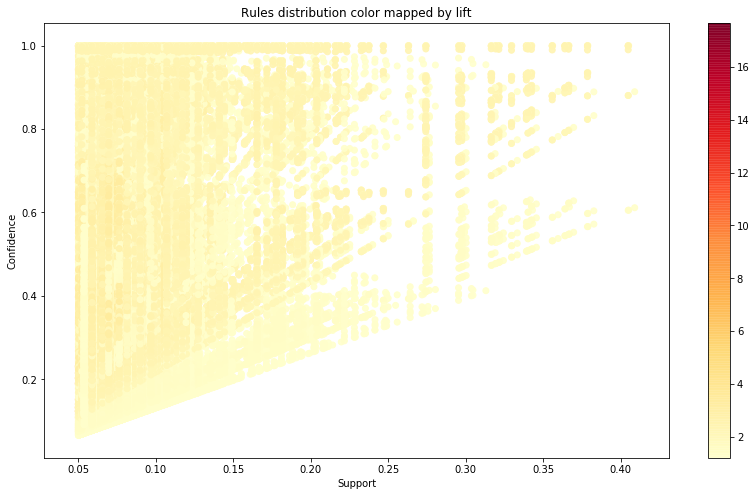

In [43]:
# Visualizing the rules distribution color mapped by Lift
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(14, 8))
plt.scatter(association_rules2['support'], association_rules2['confidence'], c=association_rules2['lift'], alpha=0.9, cmap='YlOrRd');
plt.title('Rules distribution color mapped by lift');
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.colorbar();

#### Compare the top rules using the two interestingness measures for the same levels of support (use at least two different levels of support) and comment on your findings.

In [44]:
# checking the top interestingness factor confidence .75 with a minimum support of .25
association_rules3["antecedent_len"] = association_rules3["antecedents"].apply(lambda x: len(x))
association_rules3[(association_rules3["antecedent_len"] >= 3)].sort_values(by="confidence", ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
539,"(capital-loss_0, marital-status_ Married-civ-spouse, relationship_ Husband)",(sex_ Male),0.378612,0.669205,0.378582,0.999919,1.494188,0.125212,4078.034704,3
488,"(marital-status_ Married-civ-spouse, relationship_ Husband, race_ White)",(sex_ Male),0.366420,0.669205,0.366389,0.999916,1.494184,0.121179,3946.709284,3
551,"(marital-status_ Married-civ-spouse, relationship_ Husband, native-country_ United-States)",(sex_ Male),0.363994,0.669205,0.363963,0.999916,1.494183,0.120376,3920.576518,3
528,"(marital-status_ Married-civ-spouse, relationship_ Husband, capital-gain_0)",(sex_ Male),0.355855,0.669205,0.355824,0.999914,1.494180,0.117684,3832.915973,3
689,"(capital-loss_0, relationship_ Husband, race_ White)",(sex_ Male),0.342711,0.669205,0.342680,0.999910,1.494175,0.113336,3691.335923,3


#### Since support measures the abundance or frequency of an itemset or census in a database, we can say that people who are male are frequently married and from the United States. With a confidence level of .75, it is likely to meet someone in this demographic. 

In [45]:
# checking the top interestingness factor lift 1.2 with a minimum support of .25
association_rules_lift_2 = association_rules(frequent_people2, metric="lift", min_threshold =1.2)
association_rules_lift_2["antecedent_len"] = association_rules_lift_2["antecedents"].apply(lambda x: len(x))
association_rules_lift_2[(association_rules_lift_2["antecedent_len"] >= 3)].sort_values(by="lift", ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
383,"(marital-status_ Married-civ-spouse, sex_ Male, native-country_ United-States)","(relationship_ Husband, race_ White)",0.366911,0.366696,0.339148,0.924332,2.520703,0.204603,8.369556,3
379,"(marital-status_ Married-civ-spouse, sex_ Male, race_ White)","(relationship_ Husband, native-country_ United-States)",0.369645,0.364270,0.339148,0.917498,2.518728,0.204498,7.705584,3
802,"(marital-status_ Married-civ-spouse, sex_ Male, native-country_ United-States)","(capital-loss_0, relationship_ Husband, race_ White)",0.366911,0.342711,0.316483,0.862560,2.516875,0.190739,4.782361,3
789,"(capital-loss_0, relationship_ Husband, race_ White)","(marital-status_ Married-civ-spouse, sex_ Male, native-country_ United-States)",0.342711,0.366911,0.316483,0.923470,2.516875,0.190739,8.272408,3
756,"(marital-status_ Married-civ-spouse, sex_ Male, native-country_ United-States)","(relationship_ Husband, capital-gain_0, race_ White)",0.366911,0.321642,0.296920,0.809241,2.515964,0.178905,3.556094,3


#### By using the same support value but with an interestingness metric of lift at 1.2, we can see that even if the demographics of white male and being from the United States were independent, those features tend to occur together. 

In [46]:
# checking the top interestingness factor confidence .75 with a minimum support of .025
association_rules4["antecedent_len"] = association_rules4["antecedents"].apply(lambda x: len(x))
association_rules4[(association_rules4["antecedent_len"] >= 3)].sort_values(by="confidence", ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
17451,"(>50K, <=50K._ >50K, relationship_ Husband, race_ White, workclass_ Private)",(sex_ Male),0.106231,0.669205,0.106231,1.0,1.494309,0.035141,inf,4
25769,"(>50K, <=50K._ >50K, marital-status_ Married-civ-spouse, relationship_ Husband, hours-per-week_40)",(sex_ Male),0.076871,0.669205,0.076871,1.0,1.494309,0.025429,inf,4
101274,"(education_ HS-grad, >50K, <=50K._ <=50K, capital-gain_0, race_ White, relationship_ Husband, sex_ Male, workclass_ Private, hours-per-week_40)",(marital-status_ Married-civ-spouse),0.029422,0.459937,0.029422,1.0,2.174212,0.015890,inf,8
5072,"(workclass_ Self-emp-not-inc, relationship_ Husband, >50K, <=50K._ <=50K)",(sex_ Male),0.030589,0.669205,0.030589,1.0,1.494309,0.010119,inf,3
5070,"(workclass_ Self-emp-not-inc, relationship_ Husband, native-country_ United-States)",(sex_ Male),0.043488,0.669205,0.043488,1.0,1.494309,0.014385,inf,3


#### Even by lowering the support value to .025, we see similiar demographics with a confidence of .75. White, Male, married, from the United States, working full time and making less than or equal to 50k a year.  

In [47]:
# checking the top interestingness factor lift 1.2 with a minimum support of .025
association_rules_lift_3 = association_rules(frequent_people3, metric="lift", min_threshold =1.2)
association_rules_lift_3["antecedent_len"] = association_rules_lift_3["antecedents"].apply(lambda x: len(x))
association_rules_lift_3[(association_rules_lift_3["antecedent_len"] >= 3)].sort_values(by="lift", ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
54283,"(marital-status_ Married-civ-spouse, sex_ Female, native-country_ United-States)","(relationship_ Wife, race_ White)",0.043641,0.040263,0.036301,0.831809,20.659435,0.034544,5.706219,3
150747,"(marital-status_ Married-civ-spouse, sex_ Female, capital-gain_0, native-country_ United-States)","(relationship_ Wife, race_ White)",0.037867,0.040263,0.031449,0.830495,20.626803,0.029924,5.661990,4
150799,"(capital-loss_0, relationship_ Wife, race_ White)","(marital-status_ Married-civ-spouse, sex_ Female, native-country_ United-States)",0.037591,0.043641,0.033783,0.898693,20.592777,0.032142,9.440187,3
150812,"(marital-status_ Married-civ-spouse, sex_ Female, native-country_ United-States)","(capital-loss_0, relationship_ Wife, race_ White)",0.043641,0.037591,0.033783,0.774103,20.592777,0.032142,4.260384,3
54281,"(marital-status_ Married-civ-spouse, sex_ Female, race_ White)","(relationship_ Wife, native-country_ United-States)",0.042198,0.041798,0.036301,0.860262,20.581184,0.034537,6.857130,3


#### Finally, by lowering the support value to .025, and searaching with an interestingness of lift 1.2, we see how much more a person is likely to be a White Woman, with zero capital loss, and married in the Unites States if those features were statistically independent. Since the lift score is high at around 20.6, we can say that those demographics are not very independent; they often occur. 